## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('/Users/arka_bagchi/Desktop/Springboard/GridSearchKNN_Case_Study/data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [7]:
# Replace zeros with NaN for the specified columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_with_zeros] = diabetes_data[columns_with_zeros].replace(0, np.nan)

# Display the updated dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column. </font>**

<Figure size 1080x720 with 0 Axes>

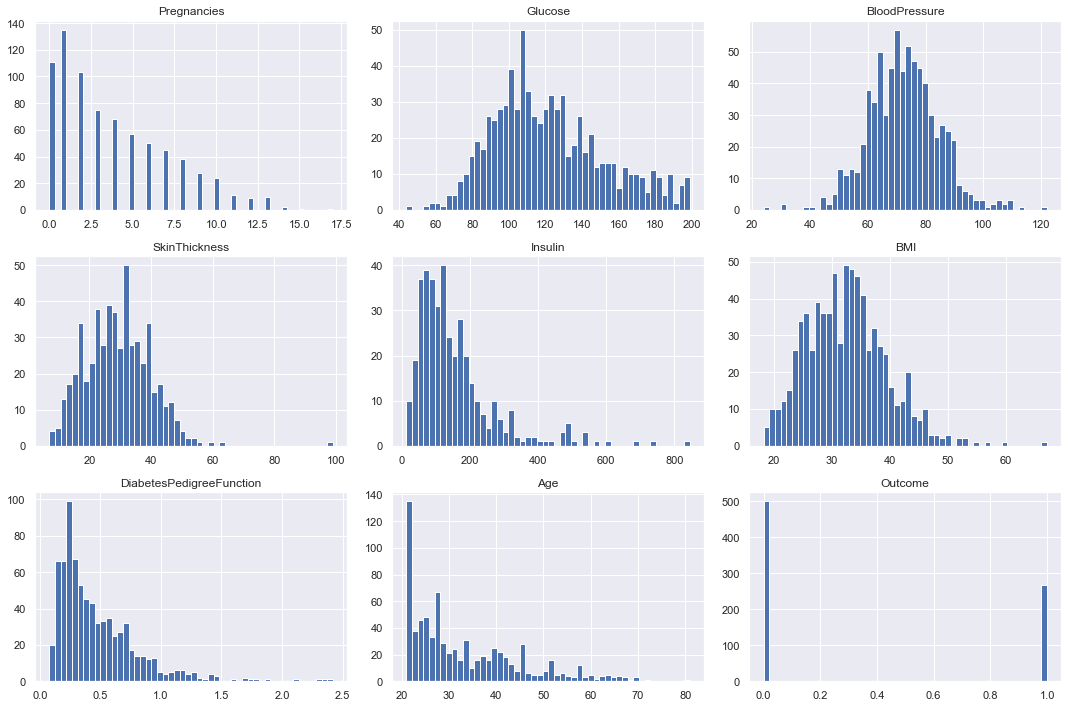

In [8]:
# Plot histograms for each column
plt.figure(figsize=(15, 10))
diabetes_data.hist(figsize=(15, 10), bins=50, layout=(3, 3))
plt.tight_layout()
plt.show()


#### Replace the zeros with mean and median values.

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

<Figure size 1080x720 with 0 Axes>

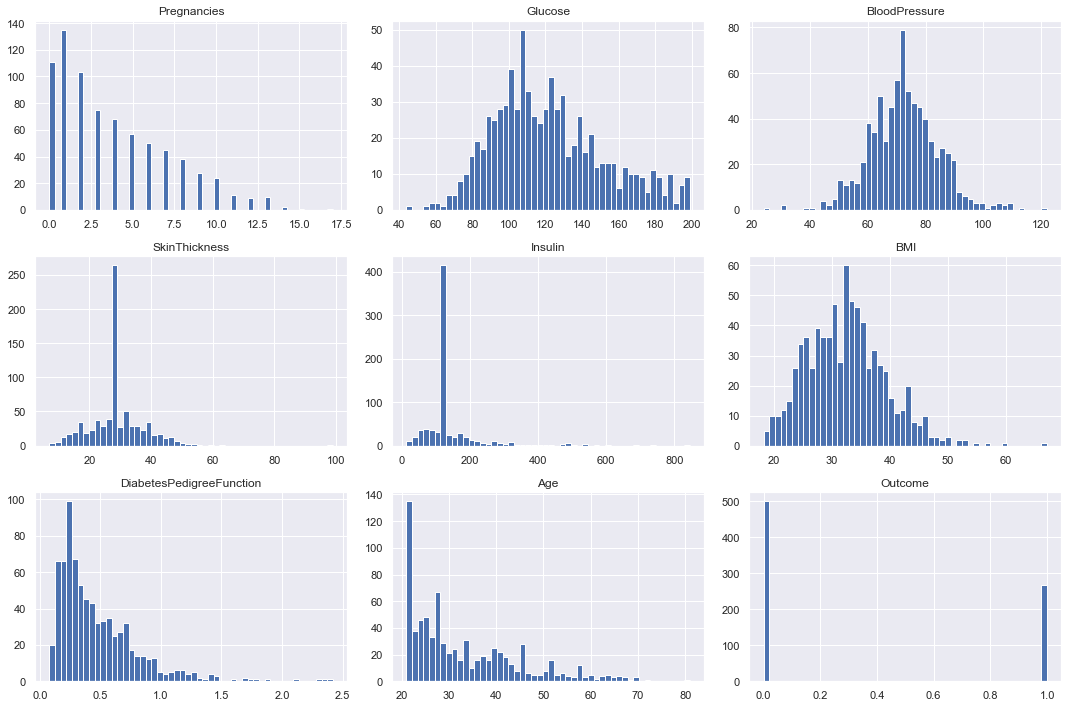

In [10]:
# Plot histograms for each column after replacing NaNs
plt.figure(figsize=(15, 10))
diabetes_data.hist(figsize=(15, 10), bins=50, layout=(3, 3))
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


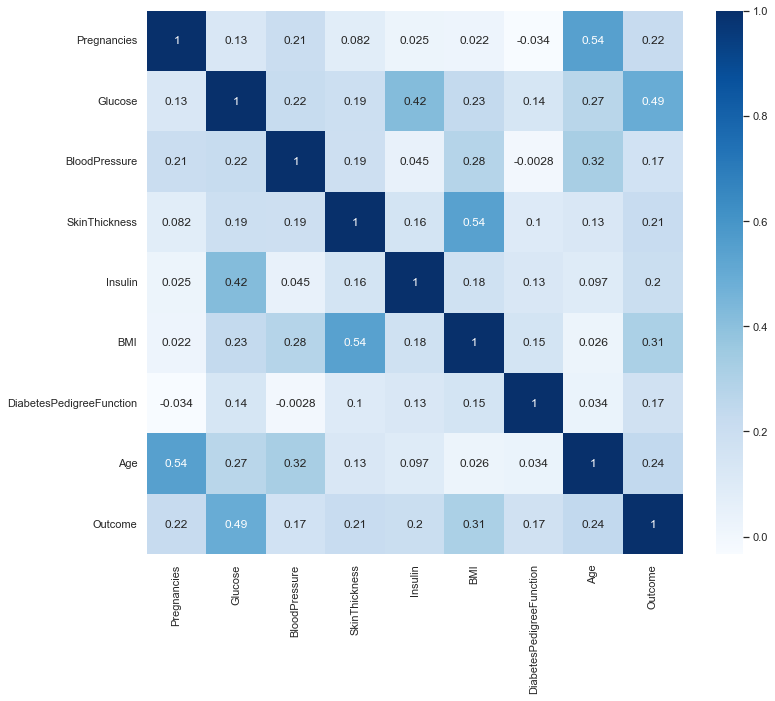

In [11]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [12]:
# Define the y variable as the 'Outcome' column
y = diabetes_data['Outcome']

y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [13]:
from sklearn.model_selection import train_test_split

# Define X as the dataset excluding the 'Outcome' column
X = diabetes_data.drop('Outcome', axis=1)

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed_number)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((537, 8), (231, 8), (537,), (231,))

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize a standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]  # Display the first 5 rows of scaled training and test data


(array([[-0.8362943 , -0.89610788, -1.00440048, -1.26954457, -0.956993  ,
         -1.20382556, -0.61421636, -0.94861028],
        [ 0.39072767, -0.56399695, -0.02026586,  0.02969309,  2.13679743,
          0.66449801, -0.90973787, -0.43466673],
        [-1.14304979,  0.43233584, -0.34831073,  1.56515578,  1.26775517,
          1.44057087, -0.30699103, -0.77729576],
        [ 0.08397217,  0.29949146, -0.34831073, -0.91520703,  0.29442785,
          0.11837266, -0.90681191, -0.43466673],
        [-0.8362943 , -0.63041914, -3.46473705,  1.09270572, -0.66731225,
          1.58428807, -0.83951493, -0.00638043]]),
 array([[ 0.69748316, -0.79647461, -1.16842292,  0.50214315,  0.57252137,
          0.24771813, -0.11680393,  0.85019217],
        [-0.52953881, -0.3315193 ,  0.2257678 ,  0.38403063, -0.18064858,
          0.49203737, -0.94192338, -1.03426754],
        [-0.52953881, -0.46436368, -0.67635561,  0.02969309, -0.18064858,
         -0.2121769 , -0.91266382, -1.03426754],
        [ 1.31

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [15]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [16]:
# Printing the train and test scores for each iteration (i.e., for each neighbor value)

for i in range(1, 10):
    print(f"For {i} neighbors:")
    print(f"Training score: {train_scores[i-1]:.4f}")
    print(f"Test score: {test_scores[i-1]:.4f}\n")


For 1 neighbors:
Training score: 1.0000
Test score: 0.6840

For 2 neighbors:
Training score: 0.8454
Test score: 0.7056

For 3 neighbors:
Training score: 0.8399
Test score: 0.6926

For 4 neighbors:
Training score: 0.8212
Test score: 0.7100

For 5 neighbors:
Training score: 0.8212
Test score: 0.6710

For 6 neighbors:
Training score: 0.8212
Test score: 0.7013

For 7 neighbors:
Training score: 0.8119
Test score: 0.6970

For 8 neighbors:
Training score: 0.8045
Test score: 0.6970

For 9 neighbors:
Training score: 0.7952
Test score: 0.7100



**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [17]:
# Identifying the number of neighbors that resulted in the max score in the training dataset

max_train_score = max(train_scores)
best_neighbors_train = train_scores.index(max_train_score) + 1  # Adding 1 because index starts from 0

best_neighbors_train

1

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [18]:
# Identifying the number of neighbors that resulted in the max score in the testing dataset

max_test_score = max(test_scores)
best_neighbors_test = test_scores.index(max_test_score) + 1  # Adding 1 because index starts from 0

best_neighbors_test


4

Plot the train and test model performance by number of neighbors.

/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


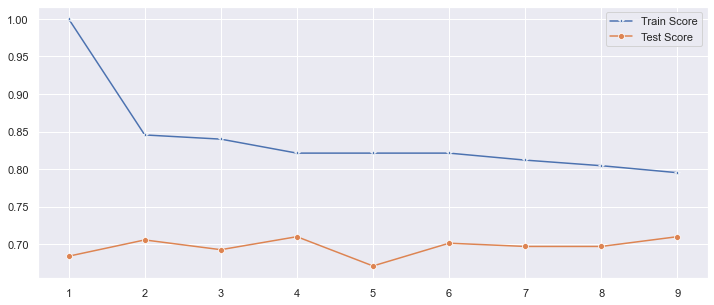

In [19]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [20]:
# Fitting and scoring the KNN classifier using the best number of neighbors based on the test scores (which is 4, as determined earlier)

knn_best = KNeighborsClassifier(best_neighbors_test)
knn_best.fit(X_train, y_train)
best_score = knn_best.score(X_test, y_test)

best_score


0.70995670995671

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x504 with 0 Axes>

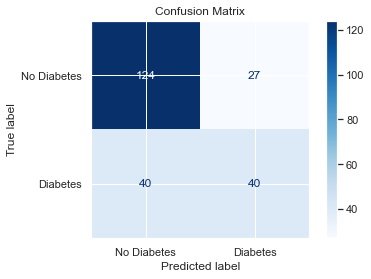

In [22]:
from sklearn.metrics import plot_confusion_matrix

# Plotting the confusion matrix for the KNN classifier with the optimal number of neighbors
plt.figure(figsize=(10, 7))
plot_confusion_matrix(knn_best, X_test, y_test, cmap='Blues', display_labels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.show()


**<font color='teal'> Print the classification report </font>**

In [23]:
from sklearn.metrics import classification_report

# Printing the classification report for the KNN classifier with the optimal number of neighbors
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])

print(report)


              precision    recall  f1-score   support

 No Diabetes       0.78      0.77      0.78       151
    Diabetes       0.58      0.60      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [25]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Defining the grid for n_estimators (number of trees in the forest)
param_grid_rf = {'n_estimators': np.arange(10, 200, 10)}  # Considering from 10 to 200 trees, in steps of 10

# Initializing the Random Forest classifier
rf = RandomForestClassifier(random_state=random_seed_number)

# Applying Grid Search with 5-fold cross validation to find the best number of estimators
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)
rf_cv.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [27]:
# Printing the best score and the best parameters (number of estimators) from the GridSearchCV results for Random Forest

best_score_rf = rf_cv.best_score_
best_params_rf = rf_cv.best_params_

best_score_rf, best_params_rf


(0.7708853238265003, {'n_estimators': 30})